In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
ctx = Population(N=1000, tau=1e-2, phi=phi, name='ctx')
bg = Population(N=1000, tau=1e-2, phi=phi, name='bg')
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8) 

S, P = 1, 3
sequences_ctx = [GaussianSequence(P,ctx.size, seed=114) for i in range(S)]
patterns_ctx = np.stack([s.inputs for s in sequences_ctx])
sequences_bg = [GaussianSequence(P,ctx.size, seed=29) for i in range(S)]
patterns_bg = np.stack([s.inputs for s in sequences_bg])

J_cc = SparseConnectivity(source=ctx, target=ctx, p=0.05)
synapse_cc = LinearSynapse(J_cc.K, A=5)
J_cc.store_attractors(patterns_ctx[0], patterns_ctx[0], synapse_cc.h_EE, 
                      plasticity.f, plasticity.g)
J_bb = SparseConnectivity(source=bg, target=bg, p=0.05)
synapse_bb = LinearSynapse(J_bb.K, A=5)
J_bb.store_attractors(patterns_bg[0], patterns_bg[0], synapse_bb.h_EE, 
                      plasticity.f, plasticity.g)
J_cb  = SparseConnectivity(source=bg, target=ctx, p=0.05)
synapse_cb = LinearSynapse(J_cb.K, A=1)
J_cb.store_attractors(patterns_bg[0], patterns_ctx[0], synapse_cb.h_EE, 
                      plasticity.f, plasticity.g)

J_bc = SparseConnectivity(source=ctx, target=bg, p=0.05)
synapse_bc = LinearSynapse(J_bc.K, A=0)
J_bc.store_sequences(patterns_ctx, patterns_bg, synapse_bc.h_EE, plasticity.f, plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][0], patterns_bg[0][1],
#                    .7, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][1], patterns_bg[0][2],
#                    .8, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][2], patterns_bg[0][0],
#                    .7, lamb=1,f=plasticity.f, g=plasticity.g)

net_ctx = RateNetwork(ctx, c_EE=J_cc, c_IE=J_bc, formulation=4)
net_bg = RateNetwork(bg, c_II=J_bb, c_EI=J_cb, formulation=4)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Storing attractors
100%|██████████████████████████████████████| 1000/1000 [00:00<00:00, 20080.35it/s]
INFO:connectivity:Building connections from bg to bg
INFO:connectivity:Storing attractors
100%|██████████████████████████████████████| 1000/1000 [00:00<00:00, 20861.99it/s]
INFO:connectivity:Building connections from bg to ctx
INFO:connectivity:Storing attractors
100%|██████████████████████████████████████| 1000/1000 [00:00<00:00, 22665.05it/s]
INFO:connectivity:Building connections from ctx to bg
INFO:connectivity:Storing sequences
100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 19.78it/s]
INFO:connectivity:Applying synaptic transfer function
INFO:connectivity:Building sparse matrix


In [4]:
# init_input_ctx = np.random.RandomState().normal(0,1,size=patterns_ctx[0][0].shape)
# init_input_bg = np.random.RandomState().normal(0,1,size=patterns_bg[0][0].shape)
init_input_ctx = patterns_ctx[0][0]
init_input_bg = patterns_bg[0][0]
T=15
mouse = ReachingTask(3, alpha=0.5)
# net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
#                           phi(patterns_ctx[0]), phi(patterns_bg[0]), plasticity, detection_thres=.23)
net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
                          patterns_ctx[0], patterns_bg[0], plasticity, detection_thres=.23)

INFO:network:Integrating network dynamics
  0%|                                       | 1/14999 [01:39<414:11:09, 99.42s/it]

initialization complete


  4%|█▌                                      | 586/14999 [01:43<01:41, 142.69it/s]

None 0


  4%|█▋                                       | 631/14999 [01:45<03:25, 70.03it/s]

[0, -1] 24


  5%|█▉                                       | 703/14999 [01:48<07:08, 33.33it/s]

aim-->reach


  8%|███                                     | 1137/14999 [02:08<10:12, 22.63it/s]

[0, 1] 505


  8%|███▎                                    | 1251/14999 [02:13<09:56, 23.03it/s]

[0, -1] 113


  9%|███▍                                    | 1302/14999 [02:15<09:54, 23.04it/s]

[0, 2] 50


  9%|███▍                                    | 1308/14999 [02:15<09:57, 22.93it/s]

[-1, 2] 5


  9%|███▌                                    | 1320/14999 [02:16<09:55, 22.97it/s]

reach-->lick


 12%|████▋                                   | 1755/14999 [02:35<10:55, 20.19it/s]

[1, 2] 447
Mouse received reward


 13%|█████                                   | 1911/14999 [02:43<10:53, 20.02it/s]

[1, -1] 156


 13%|█████                                   | 1920/14999 [02:44<10:55, 19.97it/s]

[1, 0] 6
[-1, 0] 1


 13%|█████▎                                  | 1978/14999 [02:47<10:38, 20.38it/s]

lick-->aim


 16%|██████▍                                 | 2416/14999 [03:08<09:49, 21.35it/s]

[2, 0] 495


 17%|██████▊                                 | 2536/14999 [03:13<09:40, 21.49it/s]

[2, -1] 117


 17%|██████▊                                 | 2572/14999 [03:15<09:39, 21.43it/s]

[2, 1] 36


 17%|██████▉                                 | 2578/14999 [03:15<09:35, 21.57it/s]

[-1, 1] 4


 17%|██████▉                                 | 2620/14999 [03:17<09:47, 21.08it/s]

aim-->reach


 20%|████████                                | 3041/14999 [03:38<09:23, 21.20it/s]

[0, 1] 464


 21%|████████▍                               | 3155/14999 [03:43<09:07, 21.63it/s]

[0, -1] 112


 21%|████████▌                               | 3209/14999 [03:46<09:11, 21.37it/s]

[0, 2] 52


 21%|████████▌                               | 3215/14999 [03:46<09:07, 21.51it/s]

reach-->lick
[-1, 2] 10


 24%|█████████▊                              | 3661/14999 [04:08<09:45, 19.36it/s]

[1, 2] 440
Mouse received reward


 25%|██████████                              | 3794/14999 [04:14<08:40, 21.51it/s]

[1, -1] 134


 25%|██████████▏                             | 3809/14999 [04:15<08:30, 21.93it/s]

[1, 0] 14


 25%|██████████▏                             | 3815/14999 [04:15<08:28, 22.00it/s]

[-1, 0] 4


 26%|██████████▎                             | 3887/14999 [04:18<08:10, 22.64it/s]

lick-->aim


 29%|███████████▍                            | 4300/14999 [04:46<10:46, 16.55it/s]

[2, 0] 484


 29%|███████████▊                            | 4424/14999 [04:52<08:50, 19.94it/s]

[2, -1] 122


 30%|███████████▉                            | 4481/14999 [04:55<08:19, 21.05it/s]

[2, 1] 56


 30%|███████████▉                            | 4487/14999 [04:55<08:26, 20.74it/s]

[-1, 1] 5


 30%|████████████                            | 4505/14999 [04:56<08:27, 20.69it/s]

aim-->reach
reach-->reach


 31%|████████████▌                           | 4691/14999 [05:05<08:10, 21.00it/s]

[0, 1] 205


 31%|████████████▌                           | 4715/14999 [05:06<08:10, 20.96it/s]

[0, -1] 21
[0, 2] 0
[0, -1] 0


 32%|████████████▊                           | 4784/14999 [05:10<08:04, 21.09it/s]

reach-->lick


 34%|█████████████▌                          | 5096/14999 [05:24<07:48, 21.14it/s]

[0, 2] 380


 34%|█████████████▌                          | 5105/14999 [05:25<07:51, 20.99it/s]

[-1, 2] 7
[1, 2] 0
[-1, 2] 0


 35%|█████████████▉                          | 5220/14999 [05:31<09:36, 16.98it/s]

[1, 2] 113
Mouse received reward


 36%|██████████████▏                         | 5340/14999 [05:38<07:50, 20.55it/s]

[1, -1] 118
[1, 0] 0
[1, -1] 0


 36%|██████████████▎                         | 5382/14999 [05:40<07:30, 21.37it/s]

[1, 0] 39
[-1, 0] 1


 36%|██████████████▍                         | 5409/14999 [05:41<07:19, 21.80it/s]

lick-->aim
aim-->aim


 37%|██████████████▋                         | 5526/14999 [05:46<06:52, 22.96it/s]

[2, 0] 141
[2, -1] 3


 37%|██████████████▊                         | 5565/14999 [05:48<06:44, 23.33it/s]

[2, 0] 34


 37%|██████████████▊                         | 5574/14999 [05:48<07:04, 22.18it/s]

[2, -1] 8
[2, 0] 2
[2, -1] 0


 37%|██████████████▉                         | 5580/14999 [05:49<06:55, 22.67it/s]

[2, 0] 0
[2, -1] 0
[2, 0] 0


 37%|██████████████▉                         | 5610/14999 [05:50<06:58, 22.42it/s]

[2, -1] 27
[2, 0] 0
[2, -1] 1


 40%|████████████████                        | 6003/14999 [06:08<06:56, 21.62it/s]

[2, 0] 390


 40%|████████████████                        | 6009/14999 [06:08<07:00, 21.36it/s]

[-1, 0] 5
[0, 0] 0
[-1, 0] 0


 41%|████████████████▎                       | 6117/14999 [06:13<06:32, 22.64it/s]

[0, 0] 104


 42%|████████████████▌                       | 6231/14999 [06:18<06:14, 23.40it/s]

[0, -1] 115


 42%|████████████████▊                       | 6297/14999 [06:21<06:10, 23.47it/s]

aim-->reach


 45%|█████████████████▉                      | 6735/14999 [06:40<06:02, 22.83it/s]

[0, 1] 503


 46%|██████████████████▎                     | 6852/14999 [06:45<06:01, 22.54it/s]

[0, -1] 116
[0, 2] 0
[0, -1] 0


 46%|██████████████████▎                     | 6888/14999 [06:46<05:56, 22.75it/s]

[0, 2] 33


 46%|██████████████████▍                     | 6897/14999 [06:47<05:56, 22.71it/s]

[-1, 2] 6


 46%|██████████████████▍                     | 6927/14999 [06:48<05:51, 22.96it/s]

reach-->lick


 49%|███████████████████▋                    | 7359/14999 [07:06<05:29, 23.15it/s]

[1, 2] 462
Mouse received reward


 50%|███████████████████▉                    | 7479/14999 [07:12<05:29, 22.80it/s]

[1, -1] 120


 50%|████████████████████                    | 7524/14999 [07:14<05:26, 22.86it/s]

[1, 0] 42
[-1, 0] 2


 50%|████████████████████                    | 7545/14999 [07:15<05:25, 22.88it/s]

lick-->aim


 53%|█████████████████████▎                  | 7983/14999 [07:34<05:07, 22.79it/s]

[2, 0] 456


 54%|█████████████████████▌                  | 8100/14999 [07:39<05:07, 22.42it/s]

[2, -1] 116


 54%|█████████████████████▋                  | 8136/14999 [07:40<04:59, 22.88it/s]

[2, 1] 35


 54%|█████████████████████▋                  | 8145/14999 [07:41<05:15, 21.73it/s]

[-1, 1] 8


 54%|█████████████████████▊                  | 8169/14999 [07:42<05:04, 22.41it/s]

aim-->reach


 57%|██████████████████████▉                 | 8605/14999 [08:07<06:03, 17.60it/s]

[0, 1] 459


 58%|███████████████████████▎                | 8724/14999 [08:13<05:06, 20.49it/s]

[0, -1] 117


 58%|███████████████████████▎                | 8762/14999 [08:15<05:15, 19.76it/s]

[0, 2] 39


 58%|███████████████████████▍                | 8771/14999 [08:16<04:58, 20.89it/s]

[-1, 2] 6


 59%|███████████████████████▍                | 8780/14999 [08:16<05:45, 17.98it/s]

reach-->lick


 62%|████████████████████████▌               | 9229/14999 [08:38<05:22, 17.91it/s]

[1, 2] 458
Mouse received reward


 62%|████████████████████████▉               | 9357/14999 [08:45<04:35, 20.49it/s]

[1, -1] 128


 63%|█████████████████████████               | 9375/14999 [08:46<04:23, 21.37it/s]

[1, 0] 17
[-1, 0] 3


 63%|█████████████████████████               | 9414/14999 [08:47<04:31, 20.61it/s]

lick-->lick


 63%|█████████████████████████               | 9419/14999 [08:48<05:06, 18.24it/s]

lick-->aim


 66%|██████████████████████████▎             | 9862/14999 [09:08<03:40, 23.28it/s]

[2, 0] 481


 67%|██████████████████████████▌             | 9982/14999 [09:13<03:34, 23.44it/s]

[2, -1] 118


 67%|██████████████████████████             | 10012/14999 [09:14<03:32, 23.50it/s]

[2, 1] 29
[-1, 1] 2
[2, 1] 0


 67%|██████████████████████████             | 10021/14999 [09:15<03:32, 23.47it/s]

[-1, 1] 4


 67%|██████████████████████████▏            | 10048/14999 [09:16<03:29, 23.63it/s]

aim-->reach


 70%|███████████████████████████▎           | 10486/14999 [09:34<03:14, 23.17it/s]

[0, 1] 465


 71%|███████████████████████████▌           | 10600/14999 [09:39<03:09, 23.25it/s]

[0, -1] 113


 71%|███████████████████████████▋           | 10642/14999 [09:41<03:06, 23.42it/s]

[0, 2] 41


 71%|███████████████████████████▋           | 10648/14999 [09:41<03:06, 23.36it/s]

[-1, 2] 5


 71%|███████████████████████████▋           | 10666/14999 [09:42<03:06, 23.21it/s]

reach-->lick


 74%|████████████████████████████▊          | 11104/14999 [10:01<02:47, 23.32it/s]

[1, 2] 455
Mouse received reward


 75%|█████████████████████████████▏         | 11242/14999 [10:07<02:44, 22.85it/s]

[1, -1] 137


 75%|█████████████████████████████▎         | 11263/14999 [10:08<02:43, 22.84it/s]

[1, 0] 21
[-1, 0] 1


 75%|█████████████████████████████▍         | 11308/14999 [10:10<02:41, 22.86it/s]

lick-->aim


 78%|██████████████████████████████▎        | 11641/14999 [10:24<02:27, 22.84it/s]

[2, 0] 374


 78%|██████████████████████████████▎        | 11653/14999 [10:25<02:28, 22.55it/s]

[2, -1] 11


 78%|██████████████████████████████▎        | 11659/14999 [10:25<02:27, 22.66it/s]

[2, 0] 5


 78%|██████████████████████████████▎        | 11668/14999 [10:25<02:27, 22.58it/s]

[2, -1] 9
[2, 0] 3


 78%|██████████████████████████████▍        | 11683/14999 [10:26<02:24, 22.94it/s]

[2, -1] 9
[2, 0] 3


 78%|██████████████████████████████▍        | 11689/14999 [10:26<02:25, 22.83it/s]

[2, -1] 1
[2, 0] 1


 78%|██████████████████████████████▍        | 11698/14999 [10:27<02:25, 22.65it/s]

[2, -1] 6


 78%|██████████████████████████████▌        | 11767/14999 [10:30<02:21, 22.89it/s]

[2, 0] 68
[2, -1] 3


 79%|██████████████████████████████▌        | 11776/14999 [10:30<02:21, 22.82it/s]

[2, 0] 5


 79%|██████████████████████████████▋        | 11785/14999 [10:31<02:21, 22.75it/s]

[2, -1] 6
[2, 0] 0
[2, -1] 0
[2, 0] 0


 79%|██████████████████████████████▋        | 11791/14999 [10:31<02:20, 22.82it/s]

[2, -1] 2


 79%|██████████████████████████████▉        | 11881/14999 [10:35<02:15, 22.95it/s]

aim-->reach


 79%|██████████████████████████████▉        | 11902/14999 [10:36<02:15, 22.86it/s]

[2, 1] 112
[-1, 1] 3


 82%|███████████████████████████████▉       | 12295/14999 [10:53<01:58, 22.76it/s]

[0, 1] 388


 83%|████████████████████████████████▎      | 12411/14999 [10:58<02:03, 20.92it/s]

[0, -1] 113


 83%|████████████████████████████████▍      | 12474/14999 [11:01<02:04, 20.27it/s]

[0, 2] 64
reach-->lick


 83%|████████████████████████████████▍      | 12480/14999 [11:02<02:05, 20.14it/s]

[-1, 2] 4


 86%|█████████████████████████████████▌     | 12916/14999 [11:23<01:35, 21.84it/s]

[1, 2] 434
Mouse received reward


 87%|█████████████████████████████████▉     | 13045/14999 [11:29<01:27, 22.29it/s]

[1, -1] 128


 87%|█████████████████████████████████▉     | 13072/14999 [11:30<01:26, 22.19it/s]

[1, 1] 27
[-1, 1] 3


 87%|██████████████████████████████████     | 13111/14999 [11:32<01:24, 22.37it/s]

lick-->reach


 90%|██████████████████████████████████▉    | 13447/14999 [11:47<01:15, 20.67it/s]

[2, 1] 370


 90%|██████████████████████████████████▉    | 13456/14999 [11:47<01:13, 20.96it/s]

[2, -1] 9


 90%|███████████████████████████████████    | 13471/14999 [11:48<01:12, 20.99it/s]

[2, 1] 13


 90%|███████████████████████████████████    | 13483/14999 [11:49<01:15, 20.00it/s]

[2, -1] 11


 90%|███████████████████████████████████▏   | 13552/14999 [11:52<01:07, 21.49it/s]

reach-->reach


 90%|███████████████████████████████████▎   | 13558/14999 [11:52<01:07, 21.32it/s]

reach-->lick


 91%|███████████████████████████████████▋   | 13708/14999 [11:59<00:57, 22.45it/s]

[2, 2] 225
[-1, 2] 2


 93%|████████████████████████████████████▎  | 13987/14999 [12:11<00:43, 23.29it/s]

[1, 2] 275


 94%|████████████████████████████████████▋  | 14113/14999 [12:16<00:38, 22.95it/s]

[1, -1] 125


 94%|████████████████████████████████████▊  | 14152/14999 [12:18<00:36, 23.04it/s]

[1, 0] 36
[-1, 0] 1
[1, 0] 1


 94%|████████████████████████████████████▊  | 14158/14999 [12:18<00:36, 23.14it/s]

[-1, 0] 3


 95%|████████████████████████████████████▉  | 14182/14999 [12:19<00:34, 23.42it/s]

lick-->aim


 97%|██████████████████████████████████████ | 14617/14999 [12:38<00:16, 23.44it/s]

[2, 0] 457


 98%|██████████████████████████████████████▎| 14746/14999 [12:43<00:10, 23.04it/s]

[2, -1] 127


 98%|██████████████████████████████████████▍| 14773/14999 [12:45<00:09, 22.93it/s]

[2, 1] 27


 99%|██████████████████████████████████████▍| 14782/14999 [12:45<00:09, 22.81it/s]

[-1, 1] 8


 99%|██████████████████████████████████████▌| 14818/14999 [12:47<00:07, 22.97it/s]

aim-->reach


100%|███████████████████████████████████████| 14999/14999 [12:55<00:00, 19.35it/s]


In [5]:
overlaps_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi)
# correlations_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi, correlation=True)
overlaps_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi)
# correlations_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi, correlation=True)

INFO:sequences:Computing overlaps
100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 192.91it/s]
INFO:sequences:Computing overlaps
100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 185.11it/s]


In [6]:
sns.set_style('dark') 
plt.rcParams["font.family"] = "arial"
colors = sns.color_palette('deep')

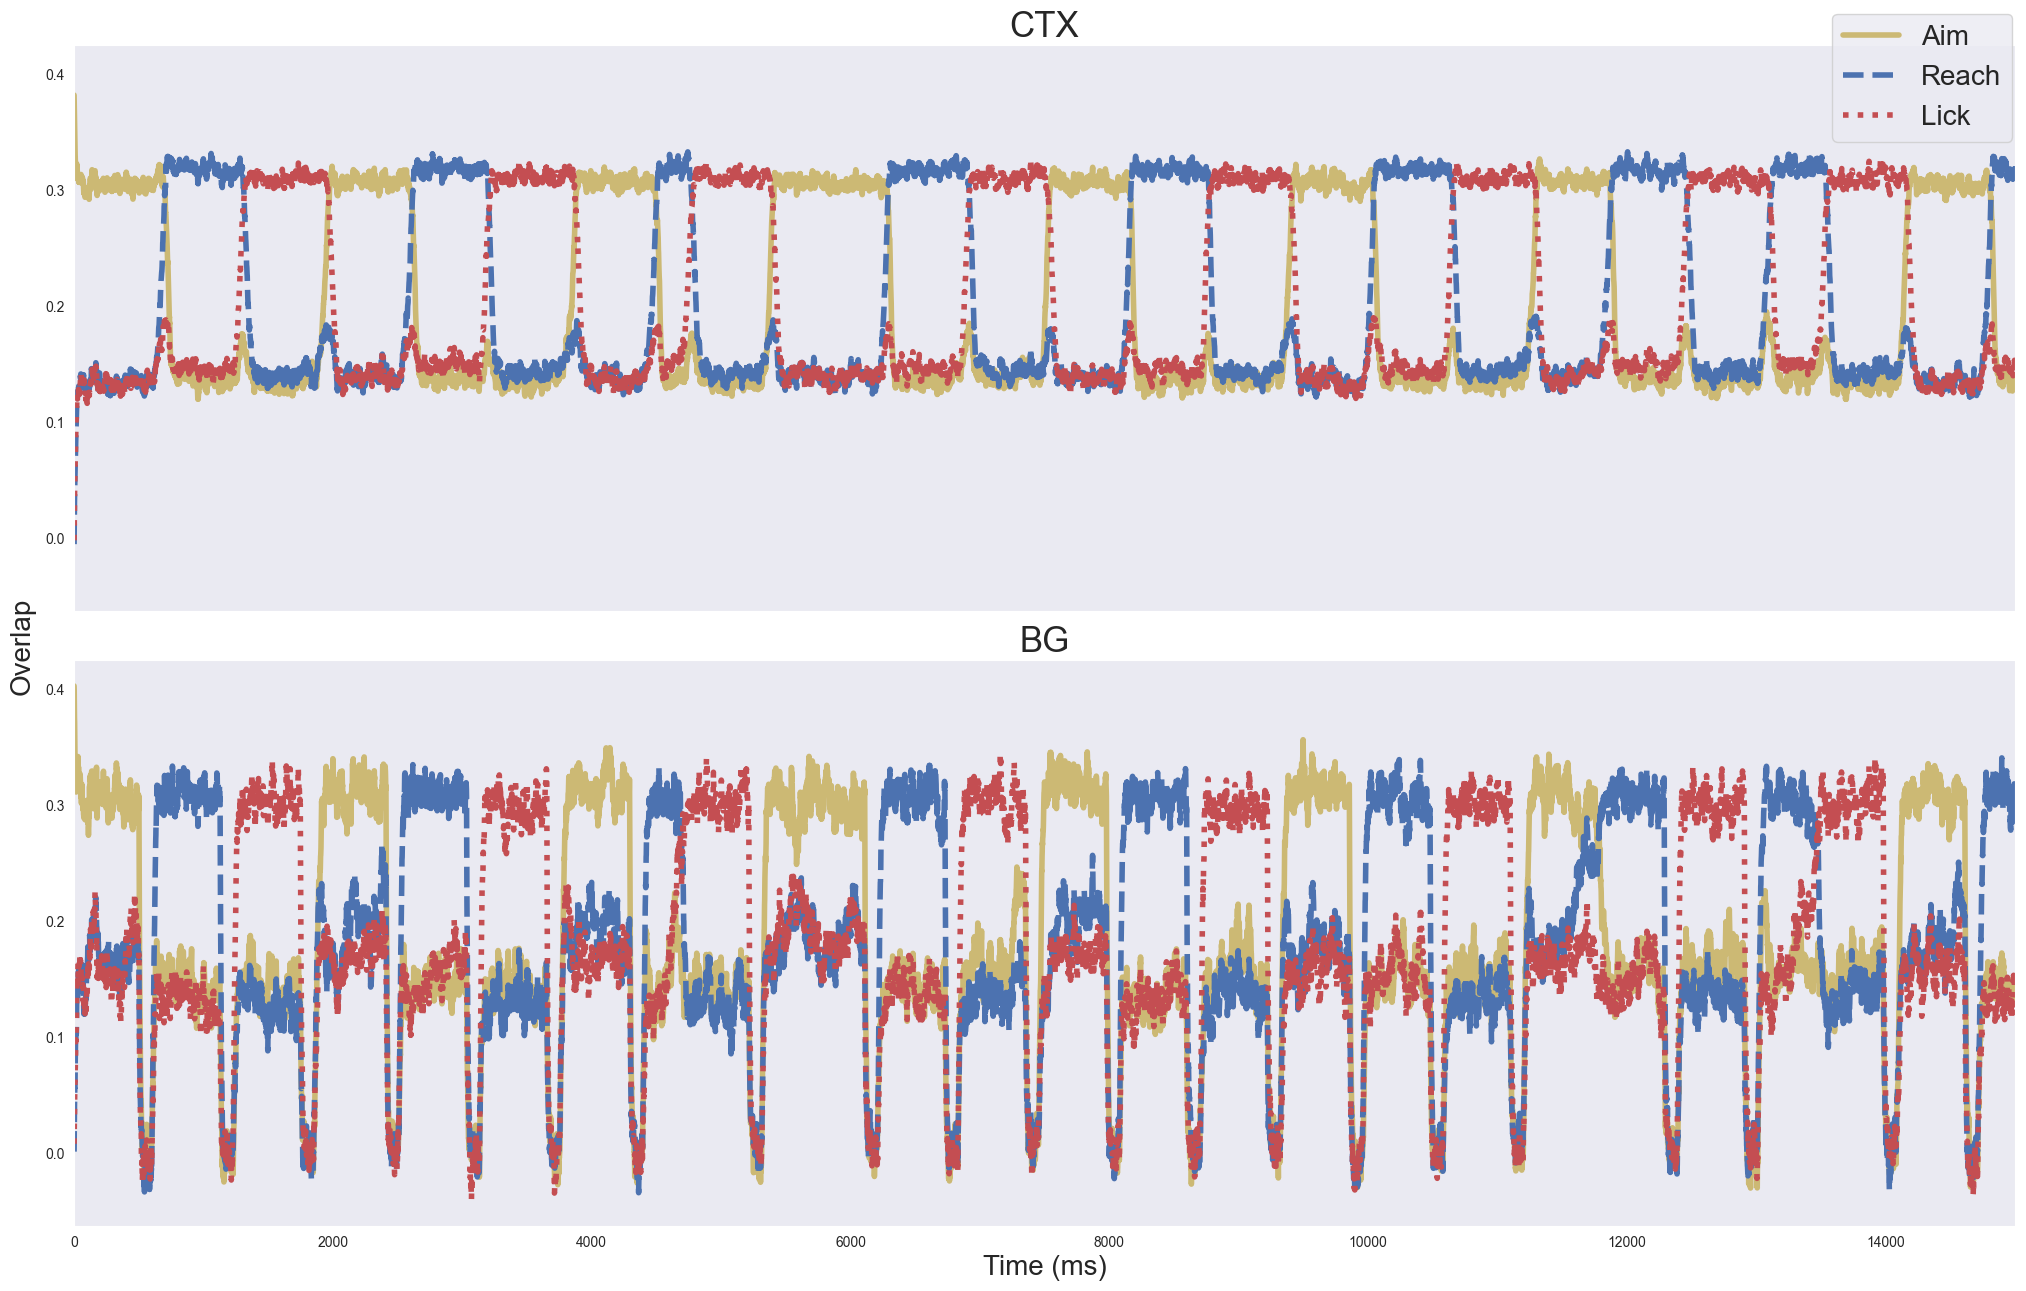

In [ ]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=4, color=colors[8])
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
axes[1].plot(overlaps_bg[0], linestyle='solid', linewidth=4, color=colors[8])
axes[1].plot(overlaps_bg[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[1].plot(overlaps_bg[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("BG", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 15000))
plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.show()


In [8]:
np.savez('./output/kindof2.npz', overlaps_ctx=overlaps_ctx, overlaps_bg=overlaps_bg)